# **Introduction to Problem Statement**
The retail industry survives on its customers. The profit in the retail industry depends on the overall sales it does in a given period of time. In this time frame the retailer may gain or lose its customers to competitors. Losing a customer is called Churning. Churning is a bane to most retailers. Customer churn occurs when a customer stops using a retailer’s product, stops visiting a particular retail store, switches to lower-tier experience or switches to competitor’s products. Retailers need a sure-shot strategy to manage customer churn. Measuring the churn rate is quite crucial for retail businesses as it reflects customer response towards the product, service, price and customer satisfaction. Customer churn minimizes the profit quotient of the business and may result in negative marketing of the brand/store and increases the cost of new acquisition.

It is possible to understand the customer based on the customer's transaction data containing the characteristics of customers, the interactions with them  and so on. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement and take proactive steps to prevent churning.

This project offers much needed insights to minimize churning and predicts the possibility of churning based on historical data.


# **Data Understanding**
We have three distinct data sets. 

The Customer data - That contains data related to the customer, obtained during  registration and the preferences that could be updated at any stage.

Transaction Data - Data related to the transactions carried on by customers

Email Data -  Data related to the emails sent by the retailer to the customer to maintain good customer relations. 

In [152]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [153]:
cust_data = pd.read_excel("/content/drive/MyDrive/DataSets/CustData.xlsx")

In [154]:
cust_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [155]:
# These are the columns in the Customer Data
cust_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

There are 23820 distinct customers 

In [156]:
cust_data["CustomerID"].value_counts().sum()

23820

In [157]:
#Below are the descriptive statistics
cust_data.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
count,23820,23820,23820,23820.000000,23820.000000,23820.000000,23820
unique,23820,4,2673,NaN,NaN,NaN,7
top,C34706,CITY4,2012-08-28 00:00:00,NaN,NaN,NaN,Tuesday
freq,1,9143,356,NaN,NaN,NaN,5343
first,NaN,NaN,2008-06-17 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-01-17 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.660411,0.094710,0.037615,NaN
std,NaN,NaN,NaN,0.473580,0.292821,0.190268,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN


In [158]:
email = pd.read_excel("/content/drive/MyDrive/DataSets/EmailData.xlsx")

In [159]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [160]:
email.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [161]:
email.columns

Index(['CustomerID', 'DateOfemail', 'EmailType', 'timestamp', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [162]:
email.describe(include="all")

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


There are 23820 distince Cutomers in the Email data set as well

In [163]:
transact = pd.read_excel("/content/drive/MyDrive/DataSets/TransData.xlsx")

In [164]:
transact.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [165]:
transact.describe(include="all")

,CustomerID,DateOfOrder,timestamp,OrderQuantity
count,104755,104755,104755,104755.000000
unique,23820,3151,21399,NaN
top,C25557,2014-01-13,12:45:20,NaN
freq,257,310,16,NaN
mean,NaN,NaN,NaN,81.319059
std,NaN,NaN,NaN,46.853569
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,50.000000
50%,NaN,NaN,NaN,71.000000
75%,NaN,NaN,NaN,100.000000


In [166]:
train = pd.read_excel("/content/drive/MyDrive/DataSets/Train.xlsx")

In [167]:
train.describe(include="all")

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C34706,Low
freq,1,19185


This is the dataset containing the Target variable.

Retention Potential is the potential for the cutomer to stay without churning. Therefore, retention potential is the opposite of our desired output. 



In [168]:
train.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [169]:
train.dtypes

CustomerID            object
RetentionPotential    object
dtype: object

In [170]:
cust_data.shape , transact.shape , email.shape

((23820, 7), (104755, 4), (517672, 6))

In [171]:
for i in ['City', 'PreferredDeliveryDay', 'OnlineCommunication', 'AutomaticRefill','DoorstepDelivery']:
  print(cust_data[i].value_counts())
  print(f'The column is {i}')
  print("*"*55)

CITY4    9143
CITY2    6879
CITY3    6490
CITY1    1308
Name: City, dtype: int64
The column is City
*******************************************************
Tuesday      5343
Monday       5300
Friday       4167
Thursday     4043
Wednesday    3778
Saturday     1003
Sunday        186
Name: PreferredDeliveryDay, dtype: int64
The column is PreferredDeliveryDay
*******************************************************
1    15731
0     8089
Name: OnlineCommunication, dtype: int64
The column is OnlineCommunication
*******************************************************
0    21564
1     2256
Name: AutomaticRefill, dtype: int64
The column is AutomaticRefill
*******************************************************
0    22924
1      896
Name: DoorstepDelivery, dtype: int64
The column is DoorstepDelivery
*******************************************************


City


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


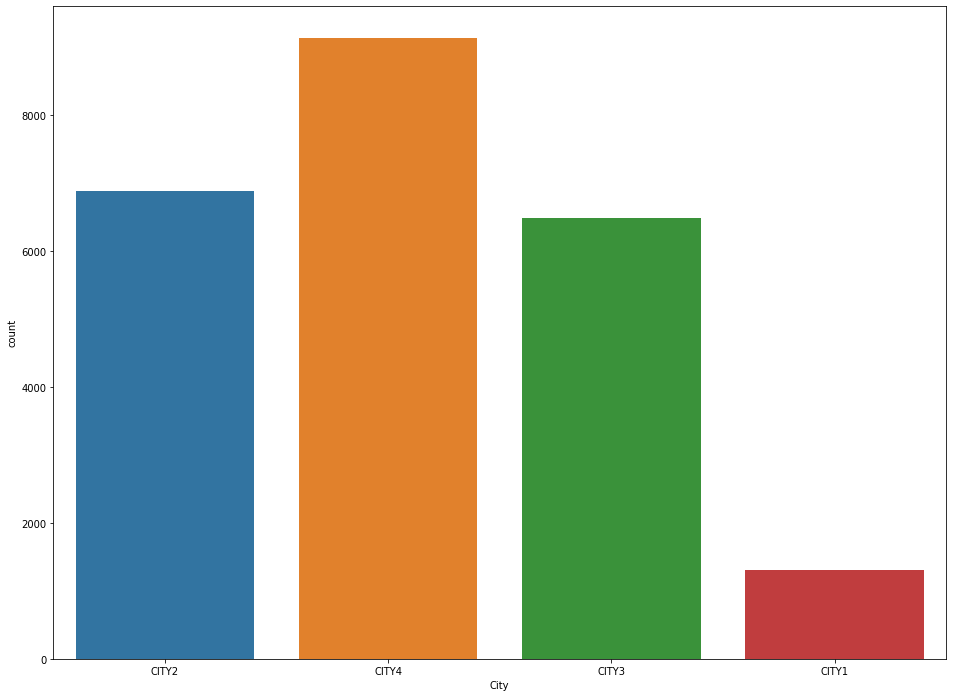

*******************************************************
PreferredDeliveryDay


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


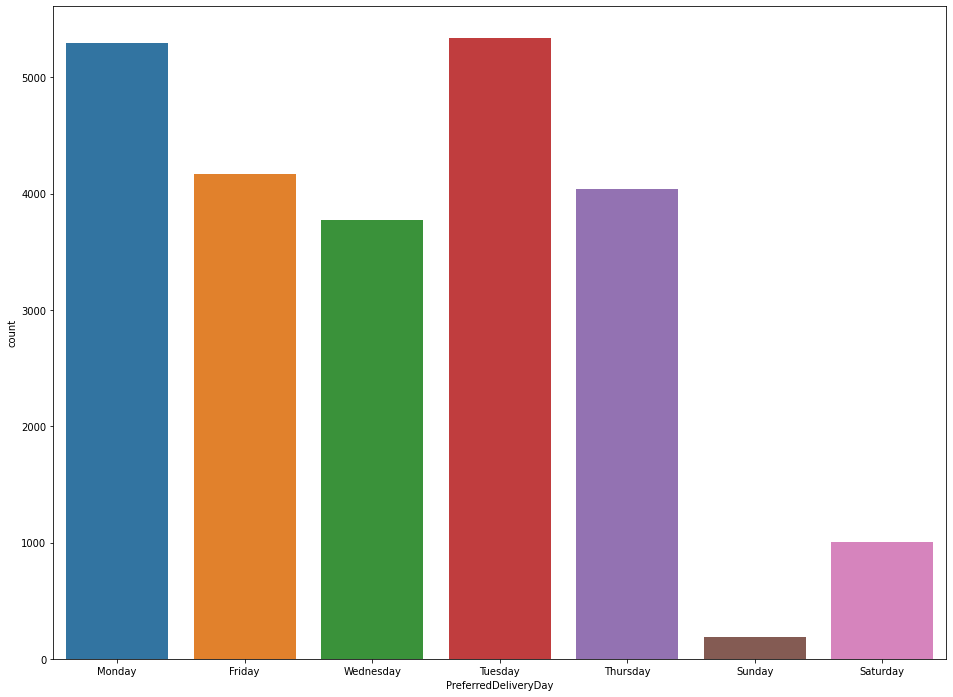

*******************************************************
OnlineCommunication


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


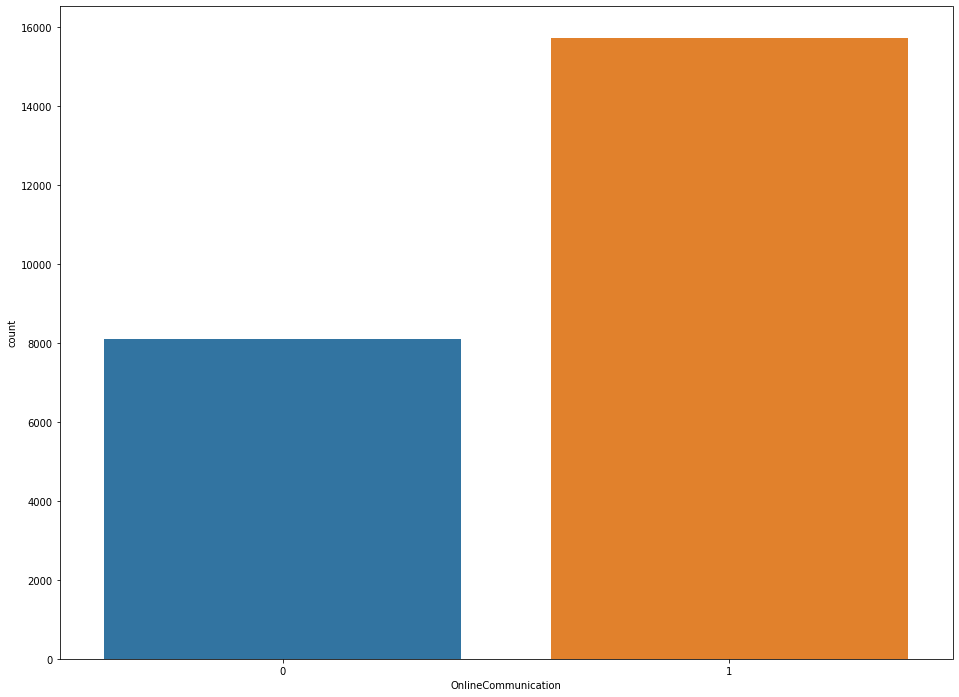

*******************************************************
AutomaticRefill


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


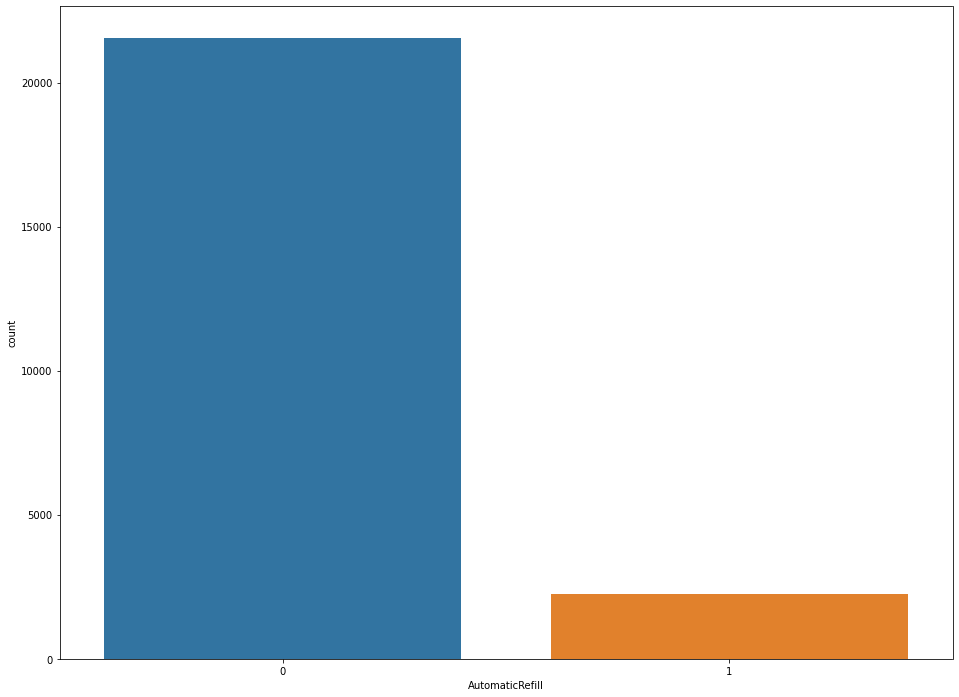

*******************************************************
DoorstepDelivery


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


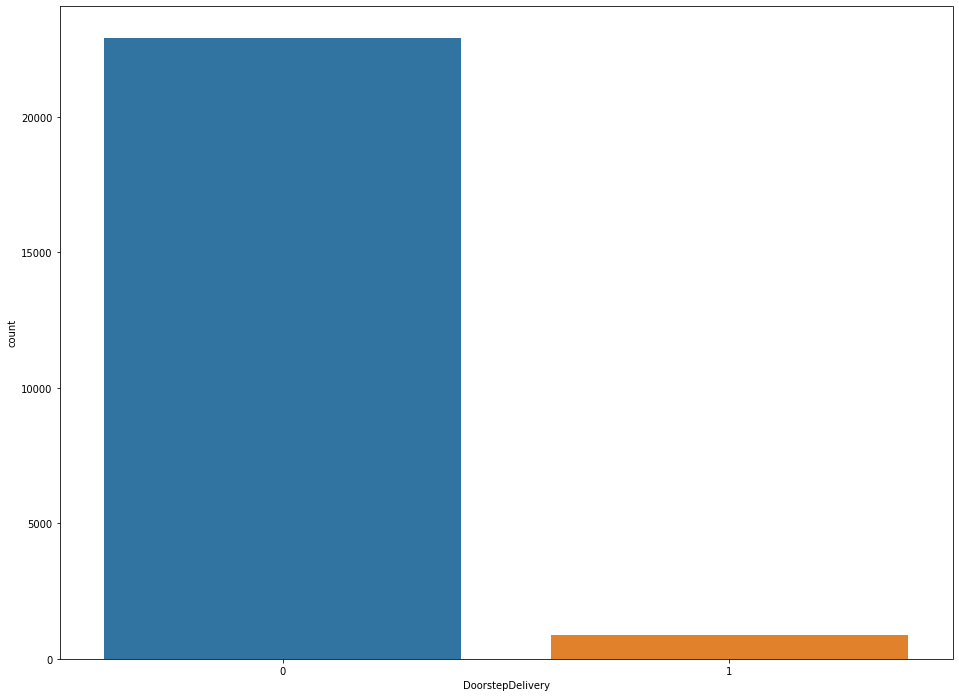

*******************************************************


In [172]:
for i in  ['City', 'PreferredDeliveryDay', 'OnlineCommunication', 'AutomaticRefill','DoorstepDelivery']:
  sns.countplot(cust_data[i])
  print(i)
  plt.show()
  print("*"*55)

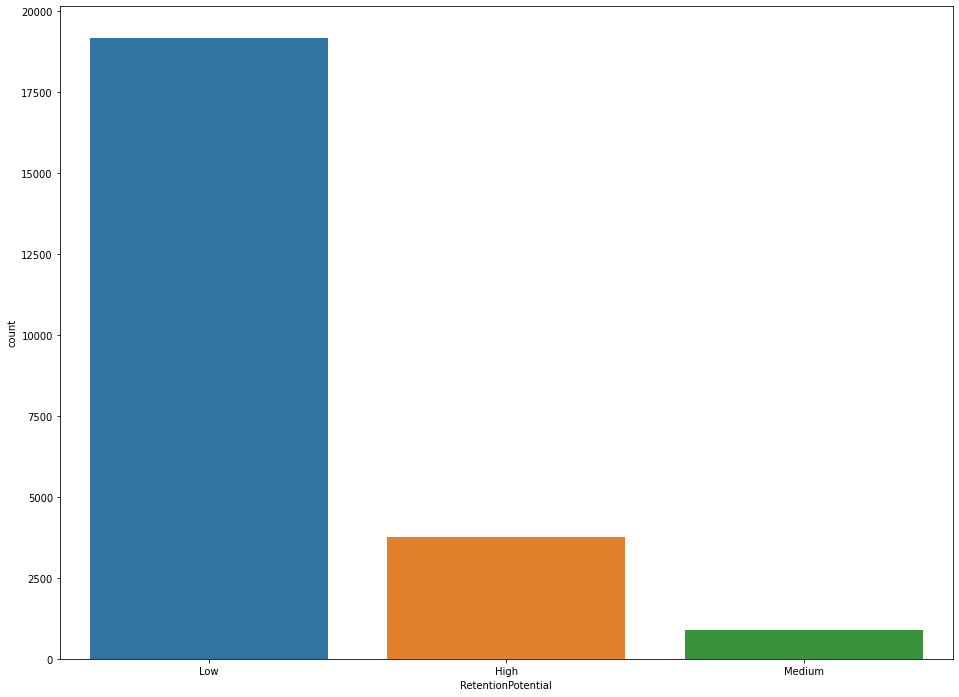

In [173]:
sns.countplot(x='RetentionPotential',data=train)

There seems to be a mismatch in the class. The low retential potential here depicts high Churn Potential.

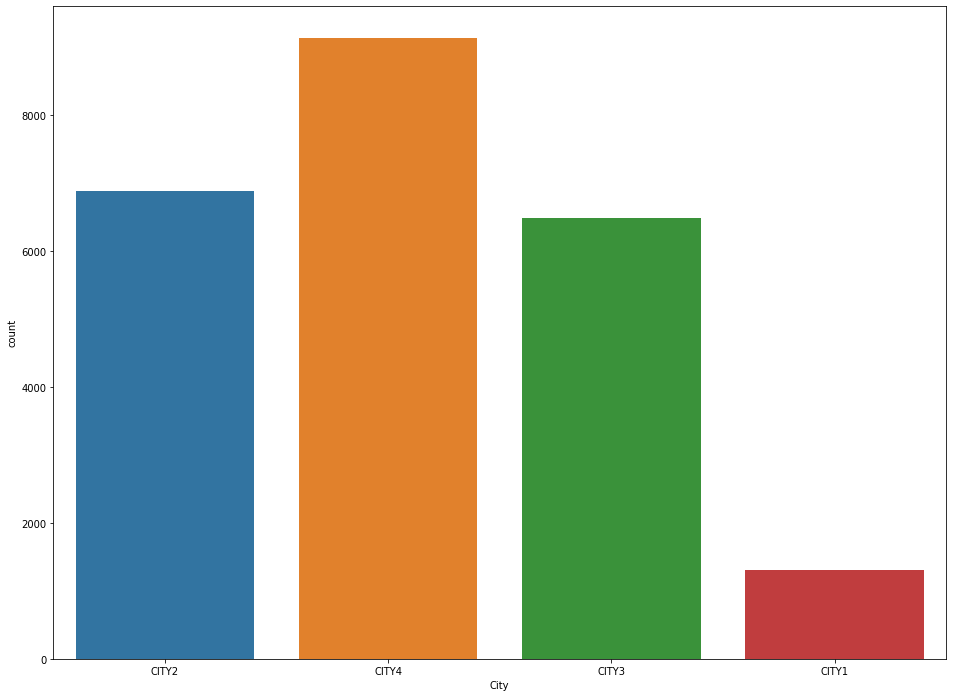

In [174]:
sns.countplot(x='City',data=cust_data)

Merging the Cutomer Data set with the Data set containing the Target Variable

In [175]:
data = pd.merge(cust_data,train,on='CustomerID',)

In [176]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low


In [177]:
data.shape

(23820, 8)

In [178]:
data.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
count,23820,23820,23820,23820.000000,23820.000000,23820.000000,23820,23820
unique,23820,4,2673,NaN,NaN,NaN,7,3
top,C34706,CITY4,2012-08-28 00:00:00,NaN,NaN,NaN,Tuesday,Low
freq,1,9143,356,NaN,NaN,NaN,5343,19185
first,NaN,NaN,2008-06-17 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.660411,0.094710,0.037615,NaN,NaN
std,NaN,NaN,NaN,0.473580,0.292821,0.190268,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN


In [179]:
data.tail()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,Low
23819,C42003,CITY4,2018-01-17,1,0,0,Friday,Low


In [180]:
data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
RetentionPotential              object
dtype: object

In [181]:
#Converting datatime to object
data.DateOfRegistration = pd.to_datetime(data.DateOfRegistration).dt.date

In [182]:
data.dtypes

CustomerID              object
City                    object
DateOfRegistration      object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
RetentionPotential      object
dtype: object

In [183]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low


Since all the columns appear to be of the categorical data type, we convert them to category

In [184]:
data = data.astype("category")

In [185]:
data.dtypes

CustomerID              category
City                    category
DateOfRegistration      category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
dtype: object

In [186]:
data.describe(include="all")

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
count,23820,23820,23820,23820,23820,23820,23820,23820
unique,23820,4,2673,2,2,2,7,3
top,C42189,CITY4,2012-08-28 00:00:00,1,0,0,Tuesday,Low
freq,1,9143,356,15731,21564,22924,5343,19185


In [187]:
#Seperating the Target Variable
y = data.RetentionPotential

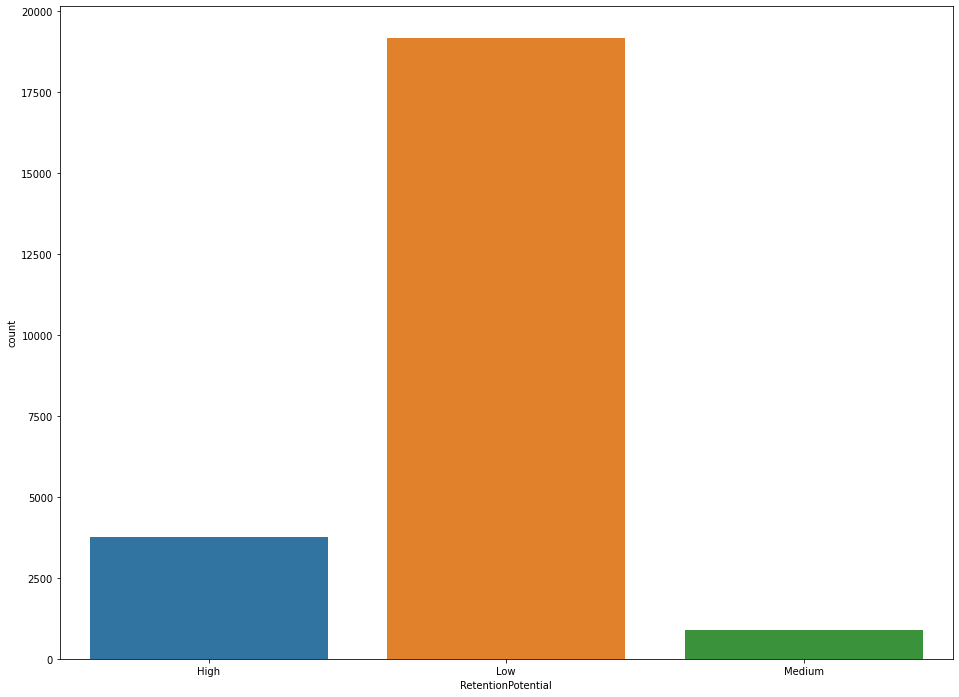

In [188]:
sns.countplot(x='RetentionPotential',data=data)

In [189]:
for a, i in enumerate(data.columns):
  print(a,i)

0 CustomerID
1 City
2 DateOfRegistration
3 OnlineCommunication
4 AutomaticRefill
5 DoorstepDelivery
6 PreferredDeliveryDay
7 RetentionPotential


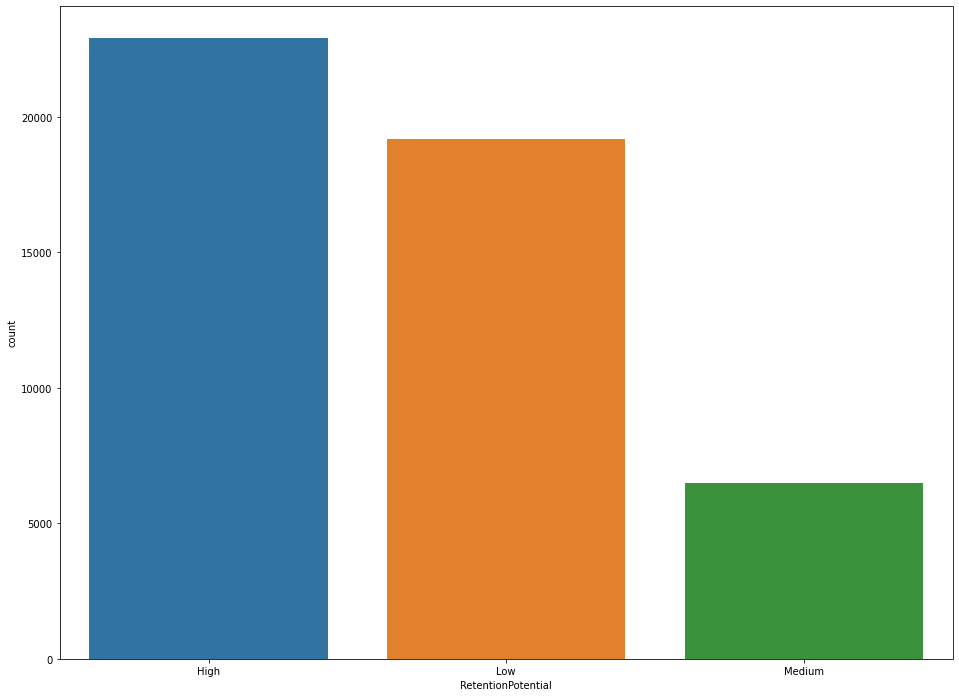

In [190]:

for i,a in enumerate(data.columns):
  sns.countplot(x=a,data=data)


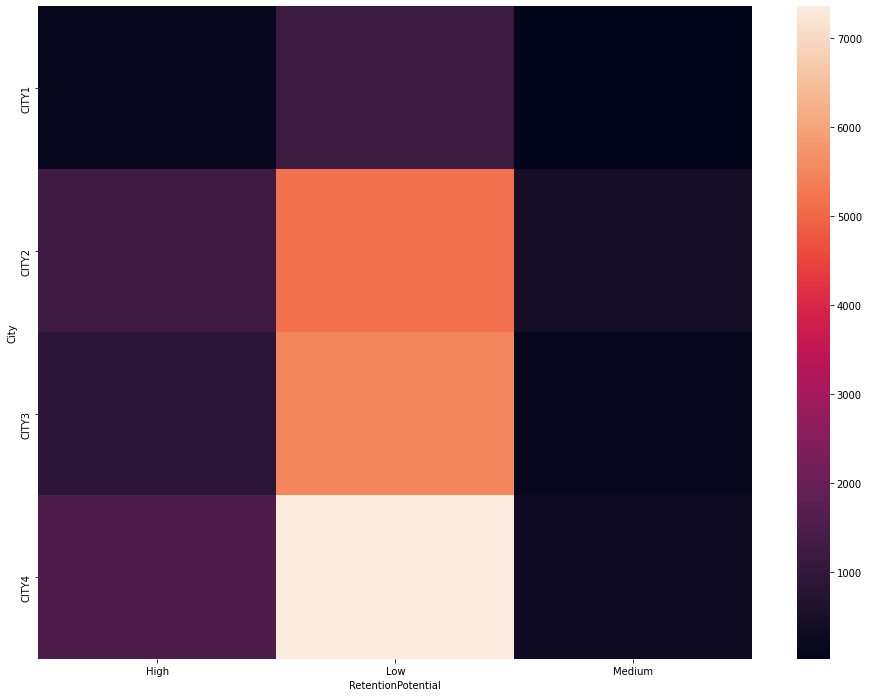

In [191]:
sns.heatmap(pd.crosstab(data["City"],data["RetentionPotential"]))

In [192]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


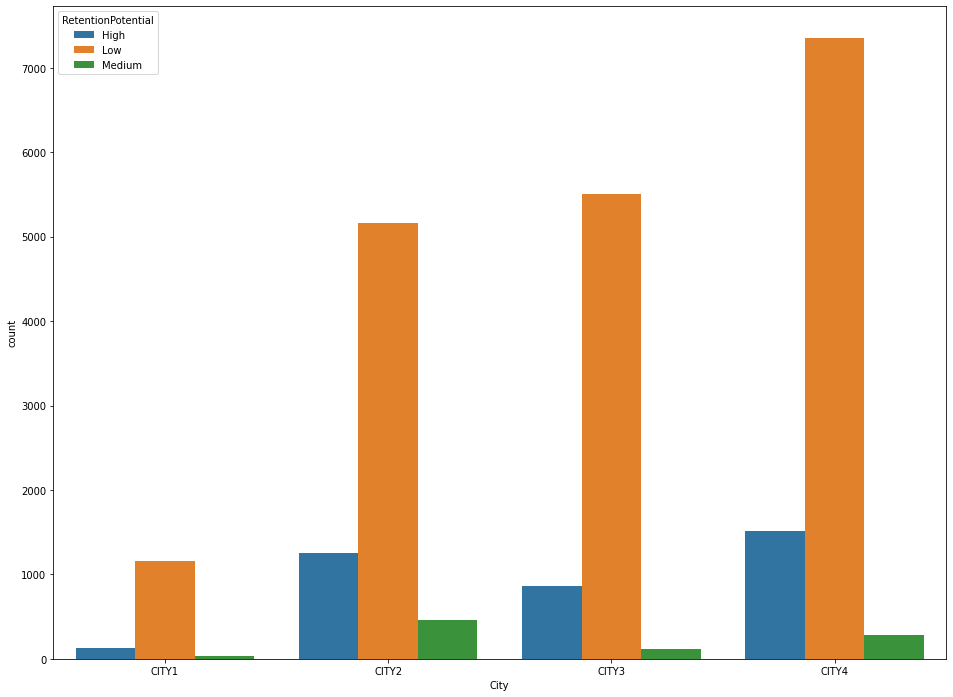

In [193]:
sns.countplot(data.City,hue=data['RetentionPotential'])

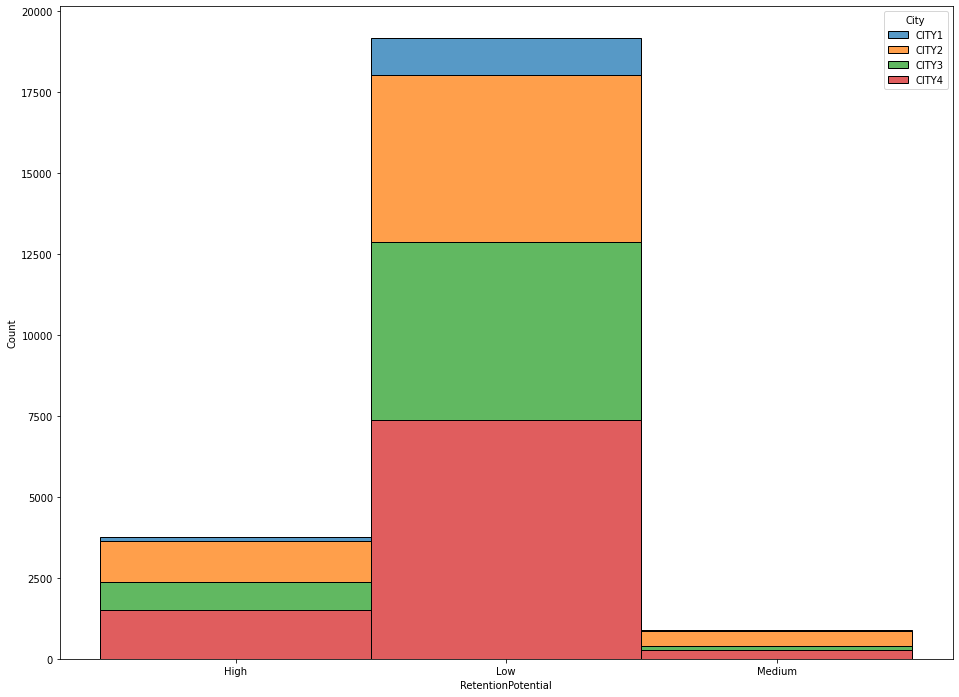

In [194]:
sns.histplot(binwidth=0.5, x='RetentionPotential', hue='City', data=data, stat="count", multiple="stack")


In [195]:
transact.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


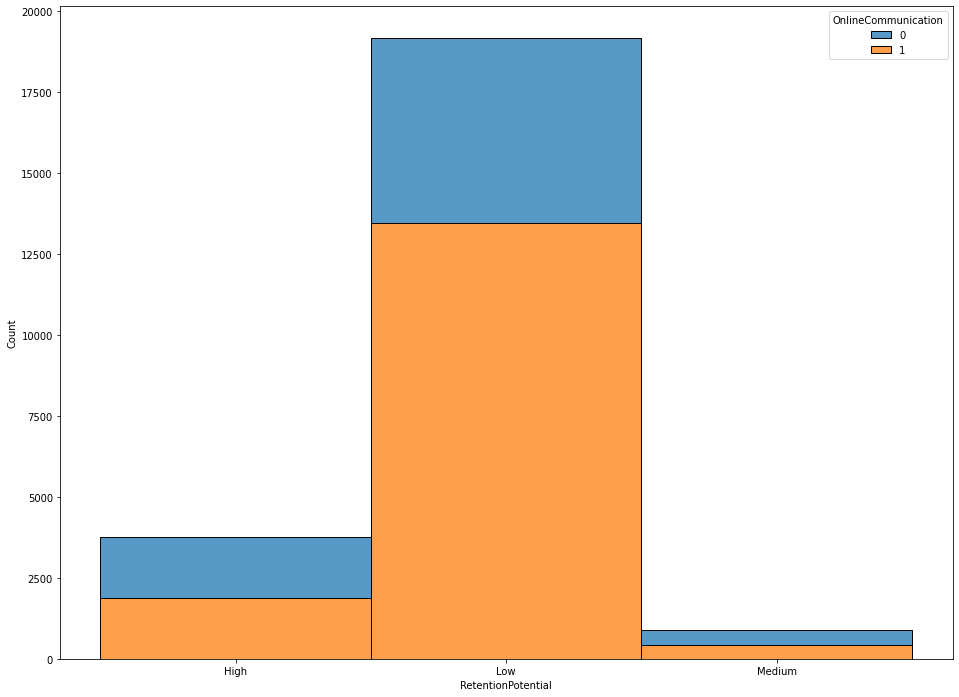

In [196]:
sns.histplot(binwidth=0.5, x='RetentionPotential', hue='OnlineCommunication', data=data, stat="count", multiple="stack")


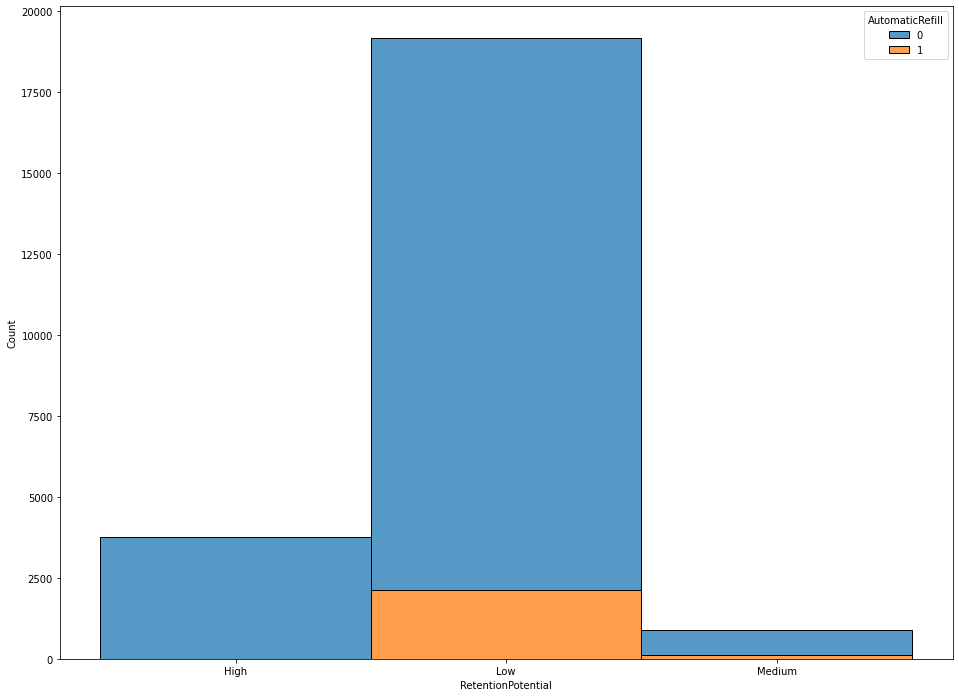

In [197]:
sns.histplot(binwidth=0.5, x='RetentionPotential', hue='AutomaticRefill', data=data, stat="count", multiple="stack")


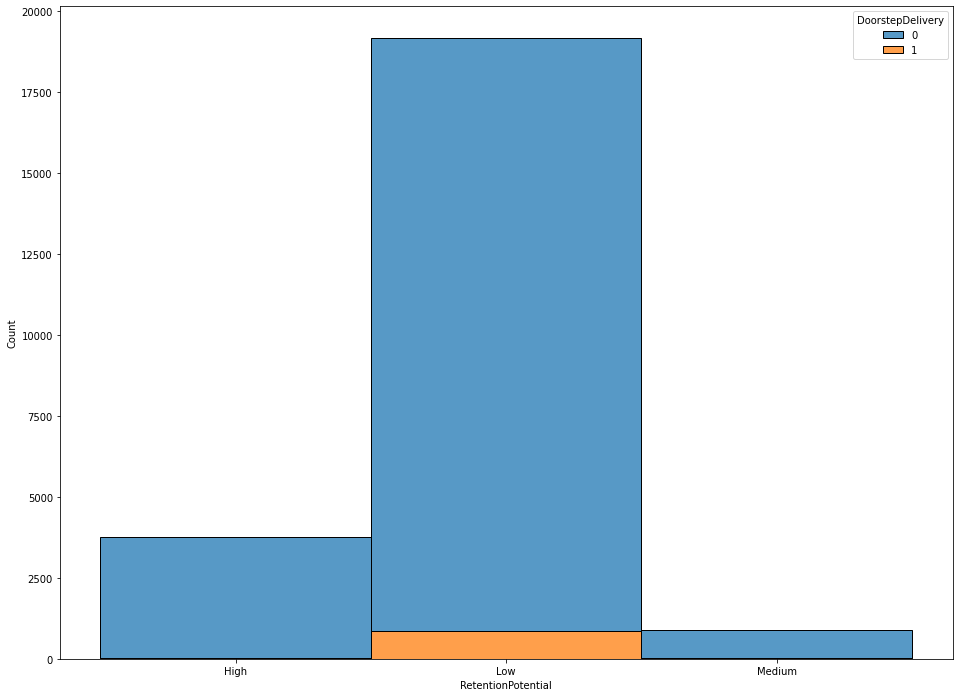

In [198]:
sns.histplot(binwidth=0.5, x='RetentionPotential', hue='DoorstepDelivery', data=data, stat="count", multiple="stack")


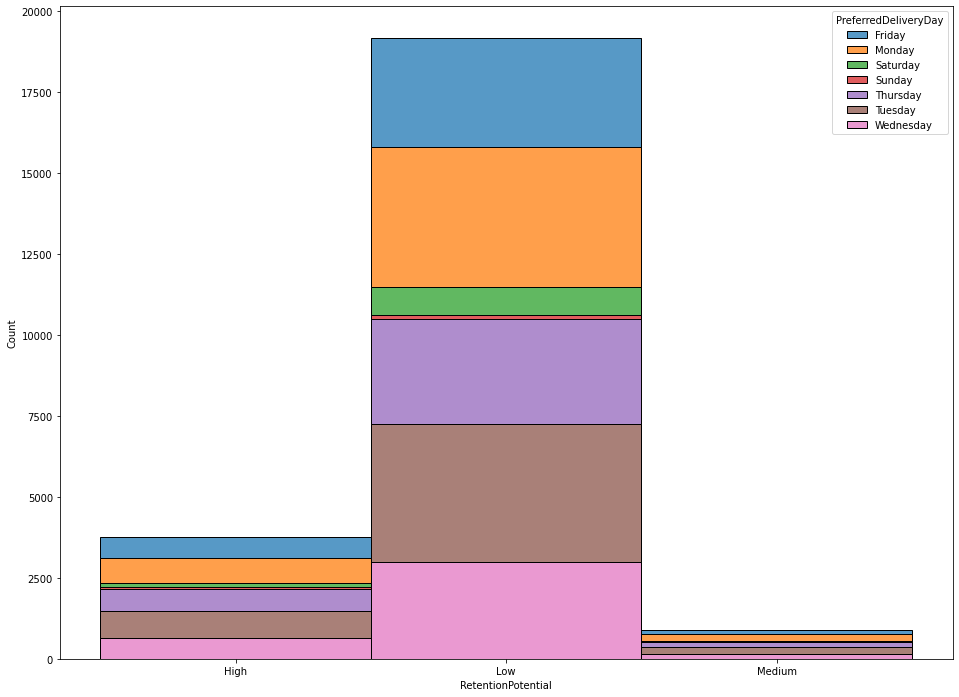

In [199]:
sns.histplot(binwidth=0.5, x='RetentionPotential', hue='PreferredDeliveryDay', data=data, stat="count", multiple="stack")



In [200]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low


In [201]:
data['YearOfRegistration'] = data['DateOfRegistration'].dt.year

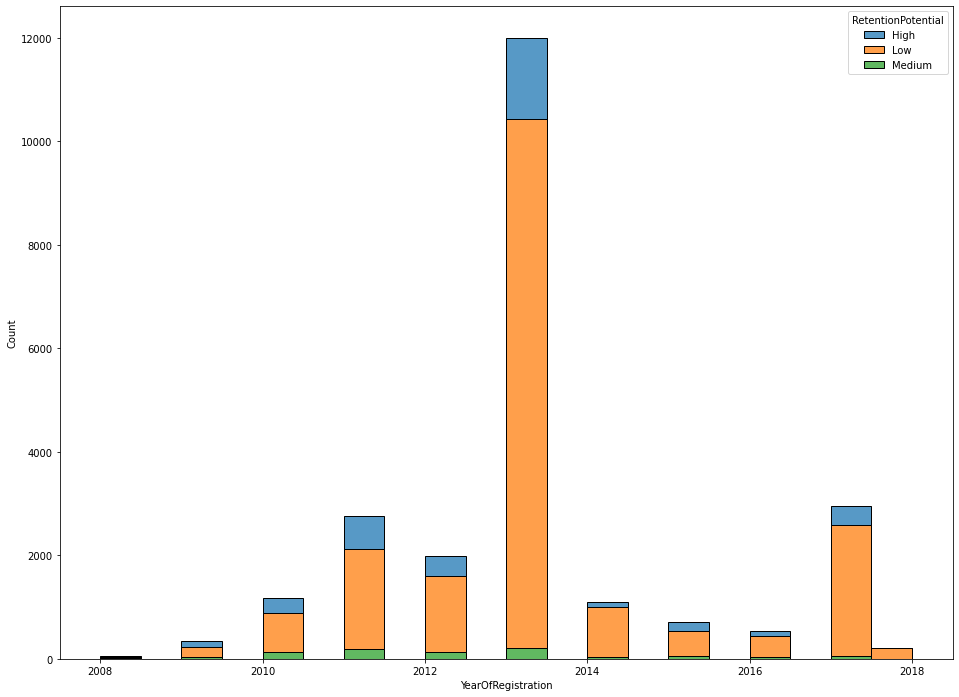

In [202]:
sns.histplot(binwidth=0.5, x='YearOfRegistration', hue='RetentionPotential', data=data, stat="count", multiple="stack")


In [203]:
transact.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [204]:
transact.head(10).groupby('CustomerID')[['CustomerID','OrderQuantity']].head(10)

,CustomerID,OrderQuantity
0,C16368,15
1,C20345,92
2,C20345,95
3,C20345,74
4,C20345,81
5,C20345,78
6,C20345,83
7,C20345,86
8,C20345,85
9,C20345,83


In [205]:
len(pd.np.unique(transact['CustomerID']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


23820

In [206]:
trans_data = transact.groupby('CustomerID').agg({'OrderQuantity': ['sum']}).reset_index()

trans_data.head()

,CustomerID,OrderQuantity
,,sum
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [207]:
trans_data.columns = ['CustomerID', 'OrderQuantity_Summed']

In [208]:
trans_data.head()

,CustomerID,OrderQuantity_Summed
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [209]:
cid = []
count = []
for i in trans_data['CustomerID'].value_counts().items():
  #print(i)
  cid.append(i[0])
  count.append(i[1])
  #break

In [210]:
cust_trans_count = pd.DataFrame({'CustomerID':cid, 'Trans_Count': count})

The Number of transactions per Customer is obtained from Transaction data set

In [211]:
cust_trans_count.head()

,CustomerID,Trans_Count
0,C12256,1
1,C41791,1
2,C27297,1
3,C24553,1
4,C23002,1


In [212]:
full_tranc = trans_data.merge(cust_trans_count)

In [213]:
full_tranc.head()

,CustomerID,OrderQuantity_Summed,Trans_Count
0,C12116,115,1
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [214]:
full_tranc[full_tranc['CustomerID']=='C25557']

,CustomerID,OrderQuantity_Summed,Trans_Count
10649,C25557,16350,1


In [215]:
tr_cs_data = data.merge(full_tranc)

In [216]:
tr_cs_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,OrderQuantity_Summed,Trans_Count
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,15,1
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,2010,15614,1
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,2010,443,1
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,2010,748,1
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,2009,2350,1


In [217]:
tr_cs_data.shape

(23820, 11)

In [218]:
len(email['CustomerID'].unique())

23820

In [219]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [220]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,2010
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,2010
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,2010
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,2009


In [221]:
email.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [222]:
email['YearOfMail'] = pd.DatetimeIndex(email['DateOfemail']).year

In [223]:
email['MailClicked'].value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

In [224]:
email.loc[email['MailOpened']=='no']['CustomerID']

23856     C20345
23862     C20345
23865     C20345
23895     C20345
23925     C20345
           ...  
517658    C15522
517662    C15522
517663    C15522
517665    C36140
517668    C36140
Name: CustomerID, Length: 369812, dtype: object

In [225]:
datas = data.merge(email)

In [226]:
datas.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,YearOfMail
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012
1,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013
2,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013
3,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,2012-11-26,CustomizedEmail,11:22:32,yes,no,2012
4,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013


In [227]:
inactive_cus =datas.loc[(datas['MailOpened']=='no') & (datas['MailClicked']=='no') & (datas['AutomaticRefill']==0)&(datas['DoorstepDelivery']==0)]['CustomerID'].unique()#['EmailType']#['YearOfRegistration']['YearOfMail']

In [228]:
trans_data.head()

,CustomerID,OrderQuantity_Summed
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [229]:
transact.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [230]:
transact[transact['CustomerID'].isin(inactive_cus)].CustomerID.nunique()

11923

In [231]:
len(inactive_cus)


11923

The attempt to get a list of Inactive Customers failed here 

The dataset to model is below

In [232]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High,2012
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low,2010
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium,2010
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low,2010
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low,2009


In [233]:
data.drop(['DateOfRegistration'],axis=1,inplace=True)

In [234]:
data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration
0,C16368,CITY2,0,0,0,Monday,High,2012
1,C20345,CITY2,1,1,1,Friday,Low,2010
2,C17683,CITY2,0,0,0,Wednesday,Medium,2010
3,C18647,CITY4,0,0,0,Monday,Low,2010
4,C36692,CITY2,1,1,0,Friday,Low,2009


In [235]:
import datetime as dt
today = dt.date.today()

In [236]:
data.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration         int64
dtype: object

In [237]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,YearOfMail
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009


In [238]:
email[email["CustomerID"].duplicated()]

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,YearOfMail
23820,C16368,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013
23821,C16368,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013
23822,C16368,2012-11-26,CustomizedEmail,11:22:32,yes,no,2012
23823,C16368,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013
23824,C16368,2013-05-18,CustomizedEmail,10:18:16,yes,no,2013
...,...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes,2018
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no,2018
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018


In [239]:
email.drop_duplicates(inplace=True)

In [240]:
to_median = {'MailOpened': 'agg(lambda x:x.value_counts().index[0]','YearOfMail':'max'}

In [241]:
emails = email.groupby(by="CustomerID").max("YearOfMail").reset_index()

In [242]:
emails.head()

,CustomerID,YearOfMail
0,C12116,2013
1,C12117,2013
2,C12118,2013
3,C12119,2013
4,C12120,2014


In [243]:
emails.nunique()

CustomerID    23820
YearOfMail       11
dtype: int64

In [244]:
data = data.merge(emails, on='CustomerID')

In [245]:
data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
0,C16368,CITY2,0,0,0,Monday,High,2012,2013
1,C20345,CITY2,1,1,1,Friday,Low,2010,2013
2,C17683,CITY2,0,0,0,Wednesday,Medium,2010,2010
3,C18647,CITY4,0,0,0,Monday,Low,2010,2012
4,C36692,CITY2,1,1,0,Friday,Low,2009,2014


In [246]:
data.dtypes

CustomerID                object
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration         int64
YearOfMail                 int64
dtype: object

In [247]:
email.CustomerID[email["MailOpened"].value_counts().max()]

'C22369'

In [248]:
emails_ope = email.groupby('CustomerID')["MailOpened"].value_counts().idxmax()

In [249]:
emails_ope

('C41705', 'yes')

In [250]:
type(emails_ope)

tuple

In [251]:
type(emails_ope)

tuple

In [252]:
#data = data.merge(emails_ope,on="CustomerID")

In [253]:
data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
0,C16368,CITY2,0,0,0,Monday,High,2012,2013
1,C20345,CITY2,1,1,1,Friday,Low,2010,2013
2,C17683,CITY2,0,0,0,Wednesday,Medium,2010,2010
3,C18647,CITY4,0,0,0,Monday,Low,2010,2012
4,C36692,CITY2,1,1,0,Friday,Low,2009,2014


In [254]:
data.describe(include="all")

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
count,23820,23820,23820.0,23820.0,23820.0,23820,23820,23820.000000,23820.000000
unique,23820,4,2.0,2.0,2.0,7,3,NaN,NaN
top,C34706,CITY4,1.0,0.0,0.0,Tuesday,Low,NaN,NaN
freq,1,9143,15731.0,21564.0,22924.0,5343,19185,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.182032,2013.485432
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.952012,1.886310
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2013.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2014.000000


In [255]:
data.RetentionPotential

0          High
1           Low
2        Medium
3           Low
4           Low
          ...  
23815       Low
23816       Low
23817       Low
23818       Low
23819       Low
Name: RetentionPotential, Length: 23820, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

Removing the high column because it is means low churn potential

In [277]:
indexs = data[data["RetentionPotential"]=="High"].index

In [278]:
data.drop(indexs,inplace=True)

In [279]:
data.shape

(20064, 9)

In [280]:
data.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration         int64
YearOfMail                 int64
dtype: object

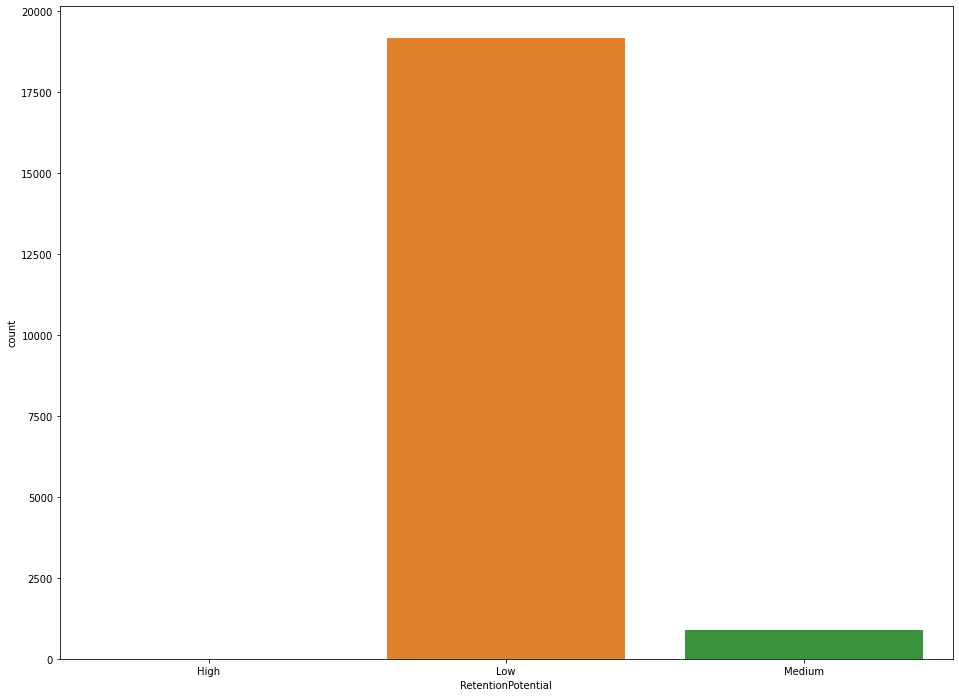

In [281]:
sns.countplot(x="RetentionPotential",data=data)

In [282]:
data["RetentionPotential"].value_counts()

Low       19185
Medium      879
High          0
Name: RetentionPotential, dtype: int64

In [283]:
data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
1,C20345,CITY2,1,1,1,Friday,Low,2010,2013
2,C17683,CITY2,0,0,0,Wednesday,Medium,2010,2010
3,C18647,CITY4,0,0,0,Monday,Low,2010,2012
4,C36692,CITY2,1,1,0,Friday,Low,2009,2014
5,C13831,CITY2,1,0,0,Monday,Low,2010,2013


In [284]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve

In [285]:
data.isna().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
RetentionPotential      0
YearOfRegistration      0
YearOfMail              0
dtype: int64

In [286]:
data.head(15)

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
1,C20345,CITY2,1,1,1,Friday,Low,2010,2013
2,C17683,CITY2,0,0,0,Wednesday,Medium,2010,2010
3,C18647,CITY4,0,0,0,Monday,Low,2010,2012
4,C36692,CITY2,1,1,0,Friday,Low,2009,2014
5,C13831,CITY2,1,0,0,Monday,Low,2010,2013
6,C40881,CITY2,0,0,1,Friday,Low,2010,2014
7,C26246,CITY2,0,0,0,Wednesday,Low,2009,2014
8,C36136,CITY2,1,1,1,Monday,Low,2009,2014
9,C34046,CITY2,0,0,0,Tuesday,Low,2010,2013
10,C23215,CITY2,1,1,0,Tuesday,Medium,2011,2013


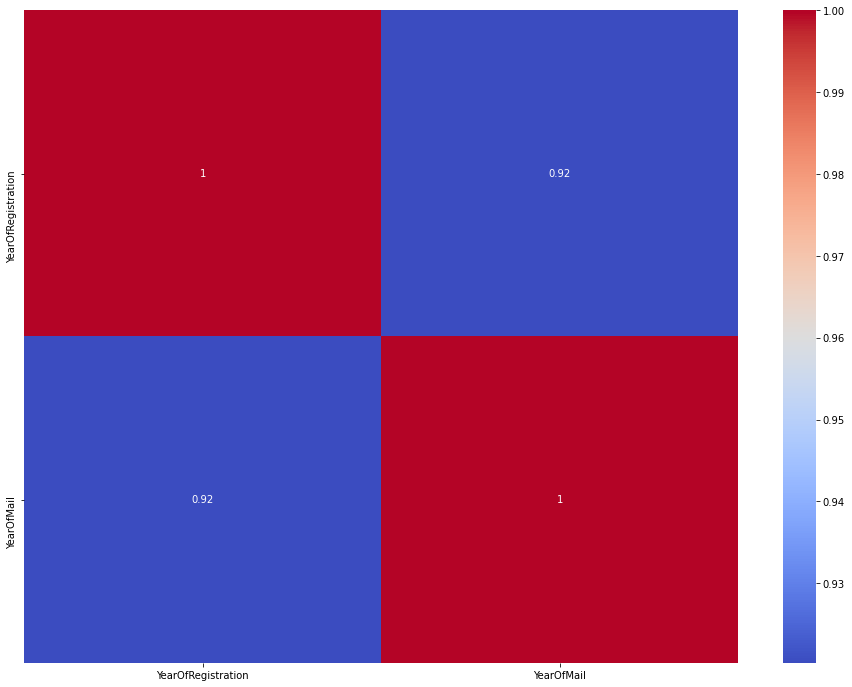

In [287]:
correl = data.corr()
sns.heatmap(correl,xticklabels=correl.columns,yticklabels=correl.columns,annot=True,cmap="coolwarm")

In [288]:
trans_data.head()

,CustomerID,OrderQuantity_Summed
0,C12116,115
1,C12117,41
2,C12118,41
3,C12119,52
4,C12120,31


In [289]:
data.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration         int64
YearOfMail                 int64
dtype: object

In [290]:
cols = ["CustomerID"]
data[cols] = data[cols].astype("category")

In [291]:
data.describe(include="all")

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration,YearOfMail
count,20064,20064,20064.0,20064.0,20064.0,20064,20064,20064.000000,20064.000000
unique,20064,4,2.0,2.0,2.0,7,2,NaN,NaN
top,C42189,CITY4,1.0,0.0,0.0,Monday,Low,NaN,NaN
freq,1,7635,13868.0,17808.0,19187.0,4543,19185,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.258274,2013.614533
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.933573,1.835953
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2013.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2014.000000


In [292]:
data.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration         int64
YearOfMail                 int64
dtype: object

In [293]:
data.nunique()

CustomerID              20064
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
RetentionPotential          2
YearOfRegistration         11
YearOfMail                 11
dtype: int64

In [300]:
#data.drop("YearOfMail",axis=1,inplace=True)

In [301]:
data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'RetentionPotential',
       'YearOfRegistration'],
      dtype='object')

In [302]:
data["YearOfRegistration"] = data["YearOfRegistration"].astype("category")

In [303]:
data.dtypes

CustomerID              category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
RetentionPotential      category
YearOfRegistration      category
dtype: object

In [304]:
custID = data["CustomerID"]
data.drop("CustomerID",axis=1,inplace=True)

In [132]:
data.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration
0,CITY2,0,0,0,Monday,High,2012
1,CITY2,1,1,1,Friday,Low,2010
2,CITY2,0,0,0,Wednesday,Medium,2010
3,CITY4,0,0,0,Monday,Low,2010
4,CITY2,1,1,0,Friday,Low,2009


In [134]:
custID.head()

0    C16368
1    C20345
2    C17683
3    C18647
4    C36692
Name: CustomerID, dtype: category
Categories (23820, object): ['C12116', 'C12117', 'C12118', 'C12119', ..., 'C42186', 'C42187',
                             'C42188', 'C42189']

In [308]:
le = LabelEncoder()

for i in data.columns:
  data[i] = le.fit_transform(data[i])

In [309]:
data.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential,YearOfRegistration
1,1,1,1,1,0,0,2
2,1,0,0,0,6,1,2
3,3,0,0,0,1,0,2
4,1,1,1,0,0,0,1
5,1,1,0,0,1,0,2


In [310]:
y = data["RetentionPotential"]

In [311]:
data.drop("RetentionPotential",axis=1,inplace=True)

In [312]:
ohe = pd.get_dummies(data=data,columns=data.columns,drop_first=True)

In [313]:
ohe.head()

,City_1,City_2,City_3,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_1,PreferredDeliveryDay_2,PreferredDeliveryDay_3,PreferredDeliveryDay_4,PreferredDeliveryDay_5,PreferredDeliveryDay_6,YearOfRegistration_1,YearOfRegistration_2,YearOfRegistration_3,YearOfRegistration_4,YearOfRegistration_5,YearOfRegistration_6,YearOfRegistration_7,YearOfRegistration_8,YearOfRegistration_9,YearOfRegistration_10
1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [314]:
df = ohe.copy(deep=True)

In [315]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,12

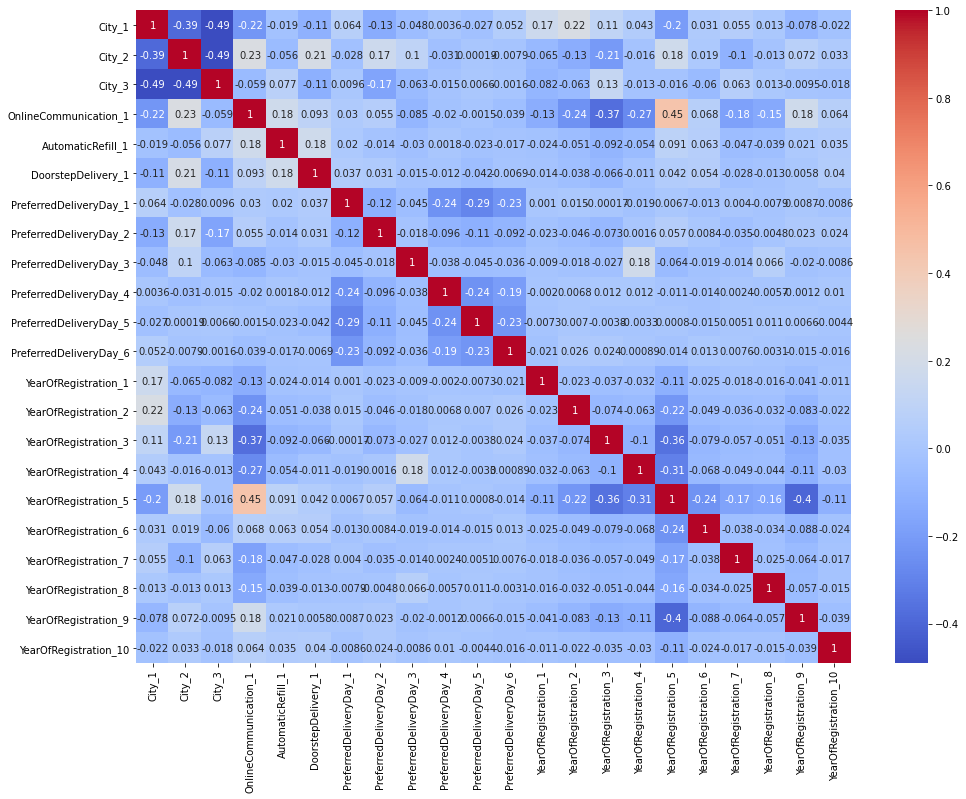

In [316]:
# Plot to see correlation between columns
correl = df.corr()
sns.heatmap(correl,xticklabels=correl.columns,yticklabels=correl.columns,annot=True,cmap = 'coolwarm')

In [317]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.20, random_state=0)
# fitting the base model
logit = LogisticRegression(fit_intercept=True)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [320]:
train_pred = logit.predict(X_train)
test_pred = logit.predict(X_val)

print(logit.score(X_train, y_train))
print(logit.score(X_val, y_val))
print("\n")
print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_val, y_pred =  test_pred)
confusion_matrix_test

0.9551429817456857
0.9603787690007476


[[15331     0]
 [  720     0]]


array([[3854,    0],
       [ 159,    0]])

In [350]:
# A function to display the evaluation metrics (recall)
meterData = []
def metrics(modeName,model,X_train,X_test,y_train,y_test):
    
    print("------------->",modeName,"\n")
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    scoreTr = model.score(X_train, y_train)
    scoreTe = model.score(X_test, y_test)
    
    acc = accuracy_score(y_test,test_pred)
    rec = recall_score(y_test,test_pred)
    prec = precision_score(y_test,test_pred)
    
    print("Test \n",confusion_matrix(y_true=y_test, y_pred =  test_pred),"\n")
    print("Train \n",confusion_matrix(y_true=y_train, y_pred =  train_pred))   
    print("\n")
    temp = {'Model': modeName, 'Accuracy': acc, 'Recall': rec,'Precision':prec,
                  'TrainScore': scoreTr,'TestScore': scoreTe}
    
    meterData.append(temp)

In [327]:
meterData

[]

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
#Using BalancedBaggingClassifier to overcome Class Imabalance

In [347]:
#defining a dict of classifiers
models= {'DT': DecisionTreeClassifier(),
'RF': RandomForestClassifier(),
'GBM':GradientBoostingClassifier(),
'SVM' : SVC(),
'AdaB': AdaBoostClassifier(),
'Bbc' : BalancedBaggingClassifier(random_state=42)}
#'Brf' : BalancedRandomForestClassifier()}

In [348]:
# Run in a loop to see which one gives good result
for key,classifier in models.items():
    
    classifier.fit(X_train,y_train)
    metrics(key,classifier,X_train,X_val,y_train,y_val)

-------------> DT 

Test 
 [[3850    4]
 [ 159    0]] 

Train 
 [[15331     0]
 [  703    17]]


-------------> RF 

Test 
 [[3851    3]
 [ 158    1]] 

Train 
 [[15329     2]
 [  701    19]]


-------------> GBM 

Test 
 [[3852    2]
 [ 159    0]] 

Train 
 [[15331     0]
 [  715     5]]


-------------> SVM 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test 
 [[3854    0]
 [ 159    0]] 

Train 
 [[15331     0]
 [  720     0]]


-------------> AdaB 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  

Test 
 [[3854    0]
 [ 159    0]] 

Train 
 [[15331     0]
 [  720     0]]


-------------> Bbc 

Test 
 [[2741 1113]
 [  51  108]] 

Train 
 [[10999  4332]
 [  178   542]]




In [352]:
#Defining a dataframe to display the score
meter = pd.DataFrame(columns=["Model","Accuracy","Recall","Precision","TrainScore","TestScore"])
#Display the score
meter = meter.append(meterData,ignore_index=True)
meter

,Model,Accuracy,Recall,Precision,TrainScore,TestScore
0,DT,0.959382,0.000000,0.000000,0.956202,0.959382
1,RF,0.959631,0.006289,0.200000,0.956202,0.959631
2,GBM,0.959880,0.000000,0.000000,0.955454,0.959880
3,SVM,0.960379,0.000000,0.000000,0.955143,0.960379
4,AdaB,0.960379,0.000000,0.000000,0.955143,0.960379
5,DT,0.959631,0.000000,0.000000,0.956202,0.959631
6,RF,0.959631,0.006289,0.200000,0.956202,0.959631
7,GBM,0.959880,0.000000,0.000000,0.955454,0.959880
8,SVM,0.960379,0.000000,0.000000,0.955143,0.960379
9,AdaB,0.960379,0.000000,0.000000,0.955143,0.960379


In [354]:
import warnings
warnings.filterwarnings("ignore")

In [355]:
# Sticking with BalancedBagging classifier 
bbc = BalancedBaggingClassifier(random_state=42)
bbc.fit(X_train, y_train) 
BalancedBaggingClassifier()
y_pred = bbc.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(recall_score(y_val,y_pred))

[[2741 1113]
 [  51  108]]
0.6792452830188679
